In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#MODELO 3: RF

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV




In [2]:
df = pd.read_csv("../data/processed/limpio1.csv")
df

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder,Nutritional Deficiencies _Biotin Deficiency,...,Medications & Treatments_Antibiotics,Medications & Treatments_Antidepressants,Medications & Treatments_Antifungal Cream,Medications & Treatments_Blood Pressure Medication,Medications & Treatments_Chemotherapy,Medications & Treatments_Heart Medication,Medications & Treatments_Immunomodulators,Medications & Treatments_No Data,Medications & Treatments_Rogaine,Medications & Treatments_Steroids
0,1,19,0,1.0,0.0,1.0,1.0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
1,2,43,0,0.0,0.0,1.0,1.0,0.0,0.0,False,...,True,False,False,False,False,False,False,False,False,False
2,1,26,0,0.0,0.0,1.0,1.0,0.0,1.0,False,...,False,False,True,False,False,False,False,False,False,False
3,1,46,0,1.0,1.0,1.0,1.0,0.0,0.0,True,...,True,False,False,False,False,False,False,False,False,False
4,1,30,1,0.0,0.0,0.0,1.0,1.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,33,1,1.0,0.0,1.0,1.0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,True,False
995,0,47,0,1.0,1.0,0.0,0.0,0.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
996,1,20,1,0.0,1.0,1.0,0.0,1.0,1.0,False,...,False,True,False,False,False,False,False,False,False,False
997,1,32,1,0.0,1.0,1.0,1.0,1.0,1.0,True,...,False,False,False,False,False,False,True,False,False,False


## TRAIN/TEST

In [3]:
X = df.drop(columns = ["Hair Loss"])
y = df["Hair Loss"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 41)
(799,)
(200, 41)
(200,)


## Entrenar Modelo

In [5]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 1, 22],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Mejores parámetros: {'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor score: 0.50937106918239


In [6]:
best_model = grid_search.best_estimator_

In [7]:
score = best_model.score(X_test, y_test)
print("Mejor score:", score)

Mejor score: 0.505


In [8]:
best_params = grid_search.best_params_

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=22, min_samples_split=5, random_state=42)

____________________________________________

In [9]:
"""model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)"""

'model = RandomForestClassifier(random_state=42)\nmodel.fit(X_train, y_train)'

## Predicciones

In [10]:
y_pred = model.predict(X_test)

## Evaluar

In [11]:
model.score(X_train, y_train)

0.9987484355444305

In [12]:
model.score(X_test, y_test)

0.49

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.49


<Axes: >

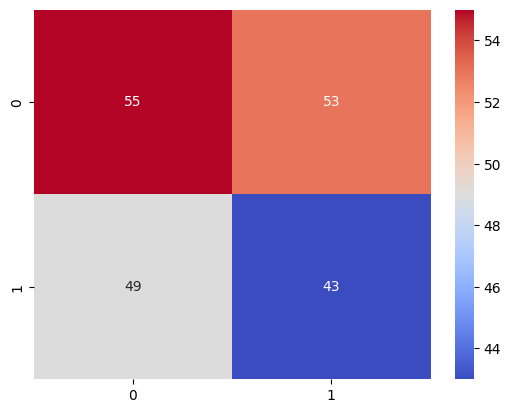

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = "coolwarm",annot= True)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       108
           1       0.45      0.47      0.46        92

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



In [16]:
accuracy_score(y, model.predict(X))


0.8968968968968969

In [17]:
y.value_counts()

Hair Loss
0    502
1    497
Name: count, dtype: int64

## PKL

In [18]:
import pickle

ruta = ("../models/M3_RF.pkl")
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Guardar el modelo en un archivo pkl
with open(ruta, 'wb') as f:
    pickle.dump(model, f)


In [19]:
ruta = "../models/M3_RF.pkl"

# Abrir y cargar el modelo desde el archivo pickle
with open(ruta, 'rb') as f:
    modelo_rf_cargado = pickle.load(f)


In [20]:
#Usar el modelo cargado para hacer predicciones:
y_pred = modelo_rf_cargado.predict(X_test)


hacer pca para arreglar desbalanceo en predicciones de 1 y 0?

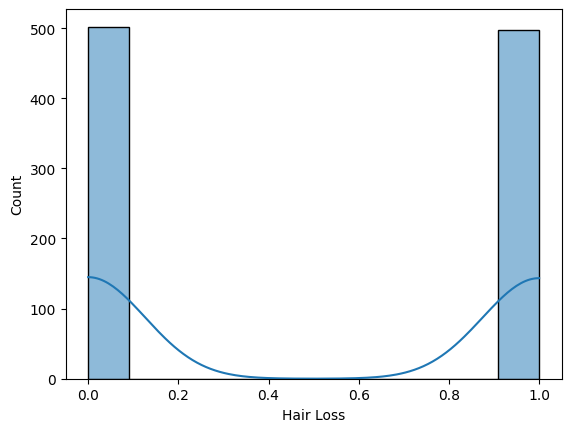

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para una columna
sns.histplot(data=df, x='Hair Loss', kde=True)
plt.show()
